# Activity 2 - MNIST Neural Network (Instructor Version)

In this activity you will train a neural network to identify images in the MNIST dataset and reinforce your skills in training neural networks.

Import pickle, numpy, matplotlib and the Sequential and Dense classes from keras.

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


Load the mnist.pkl file which contains the first 10 000 images and corresponding labels from the MNIST dataset (http://yann.lecun.com/exdb/mnist/).  The MNIST dataset is a series of 28 x 28 grayscale images of hand written digits 0 through 9.  Extract the images and labels.

In [2]:
with open('mnist.pkl', 'rb') as f:
    data = pickle.load(f)
    
images = data['images']
labels = data['labels']

Plot the first 10 samples along with the corresponding labels.

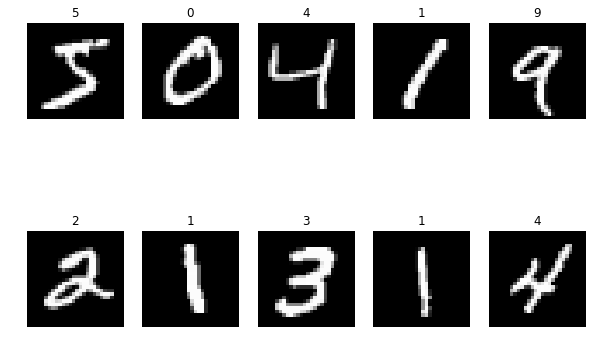

In [3]:
plt.figure(figsize=(10, 7))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(labels[i])
    plt.axis('off')

Encode the labels using **one hot encoding**

In [4]:
one_hot_labels = np.zeros((images.shape[0], 10))

for idx, label in enumerate(labels):
    one_hot_labels[idx, label] = 1
    
one_hot_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

Prepare the images for input into a neural network.  As a hint there are **two** separate steps in this process.

In [5]:
images = images.reshape((-1, 28 ** 2))
images = images / 255.

Construct a neural network model in Keras that accepts the prepared images, has a hidden layer of 600 units with a ReLU activation function and an output of the same number of units as classes.  The output layer uses a softmax activation function.

In [6]:
model = Sequential([
    Dense(600, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax'),
])

Instructions for updating:
Colocations handled automatically by placer.


Compile the model using multi class cross entropy, stochastic gradient descent and an accuracy performance metric.

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

Train the model.  How many epochs are required to achieve at least 95% classification accuracy on the training data?

In [10]:
model.fit(images, one_hot_labels, epochs=20)

Epoch 1/20
10000/10000 [==============================] - 2s 159us/step - loss: 0.2691 - acc: 0.9289
Epoch 2/20
10000/10000 [==============================] - 2s 152us/step - loss: 0.2595 - acc: 0.9317
Epoch 3/20
10000/10000 [==============================] - 2s 153us/step - loss: 0.2512 - acc: 0.9341
Epoch 4/20
10000/10000 [==============================] - 2s 151us/step - loss: 0.2438 - acc: 0.9364
Epoch 5/20
10000/10000 [==============================] - 2s 155us/step - loss: 0.2366 - acc: 0.9373
Epoch 6/20
10000/10000 [==============================] - 2s 152us/step - loss: 0.2296 - acc: 0.9393
Epoch 7/20
10000/10000 [==============================] - 2s 152us/step - loss: 0.2236 - acc: 0.9409
Epoch 8/20
10000/10000 [==============================] - 2s 154us/step - loss: 0.2175 - acc: 0.9412
Epoch 9/20
10000/10000 [==============================] - 2s 151us/step - loss: 0.2119 - acc: 0.9439
Epoch 10/20
10000/10000 [==============================] - 2s 153us/step - loss: 0.2065 - a

15 epochs are required to achieve at least 95% classification accuracy on the training set.